**NAMA : DIKY ANDRIANTO**
<br>**NIM : G.231.21.0151**</br>
**TEKNIK INFORMATIKA B SORE**
<br>**Project 1 Pertemuan 14**</br>

Soal

Buat sebuah line chart dengan menggunakan matplotlib yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Dengan menggunakan dataset yang sama pada Data Visualization with Python Matplotlib for Beginner part-1 (‘https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

1. Ukuran figure adalah 10x5
2. Sumbu-x adalah tanggal pembelian, dari tanggal 1–31 Desember 2019
3. Sumbu-y adalah jumlah unique customers di tiap tanggal
4. Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

In [17]:
# Import library
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [18]:
# Membaca dataset
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [20]:
# Mengambil data hanya untuk bulan Desember 2019
df['order_month'] = df['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [22]:
# Membuat kolom jumlah barang yang dijual
df['jual'] = df['item_price'] * df['quantity']

(0.0, 41.05)

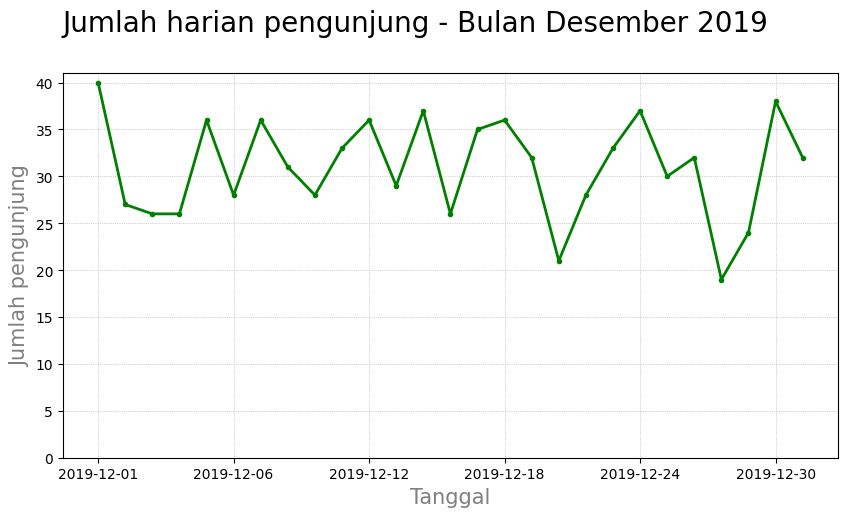

In [34]:
# Membuat plot grafik
plt.figure(figsize=(10, 5))
df[df['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='green', marker='.', linewidth=2)
plt.title('Jumlah harian pengunjung - Bulan Desember 2019', loc='left', pad=30, fontsize=20, color='black')
plt.xlabel('Tanggal', fontsize=15, color='grey')
plt.ylabel('Jumlah pengunjung', fontsize=15, color='grey')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

Kasus 1

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [28]:
# Ambil data dengan penjualan tertinggi berdasarkan quantity
top_brands = (df[df['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
df_top5brand_desember = df[(df['order_month']=='2019-12') & (df['brand'].isin(top_brands['brand'].to_list()))]
# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Kasus 2

Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

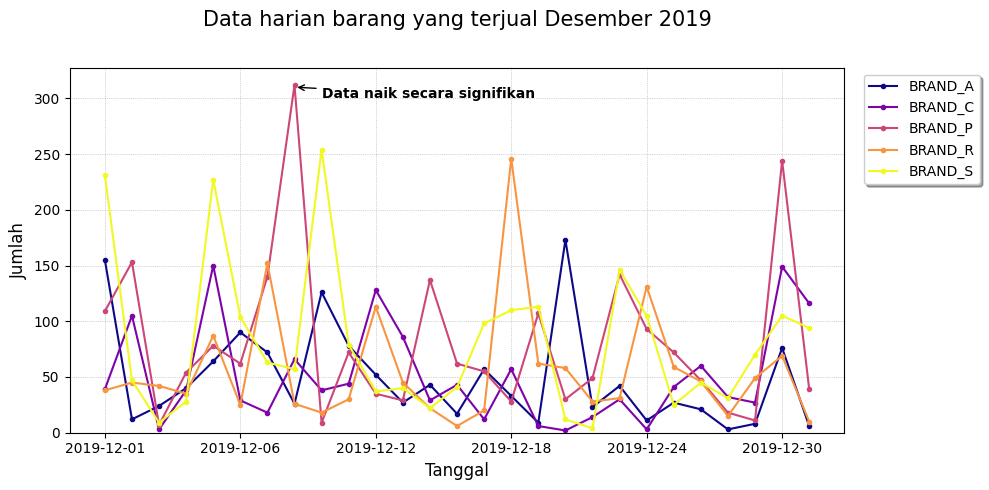

In [36]:
# Menggunakan barchart untuk visualisasi

df_top5brand_desember.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Data harian barang yang terjual Desember 2019',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Tanggal', fontsize = 12)
plt.ylabel('Jumlah',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Data naik secara signifikan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='black',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='black'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

Kasus 3

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

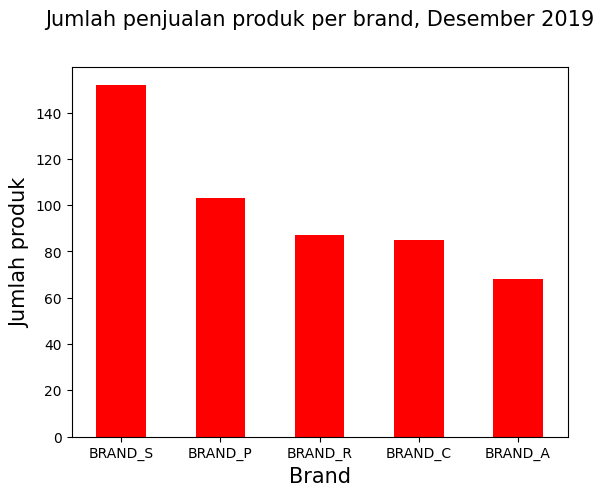

In [37]:


plt.clf()
df_top5brand_desember.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Jumlah penjualan produk per brand, Desember 2019',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Kasus 4

Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019 Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

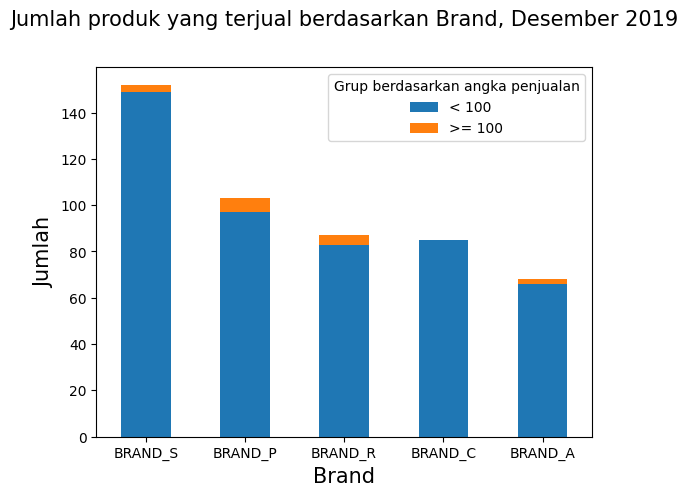

In [50]:
# Membuat dataframe baru
df_top5brand_desember_per_product = df_top5brand_desember.groupby(['brand','product_id'])['quantity'].sum().reset_index()

# Beri kolom baru untuk menandai produk terjual
df_top5brand_desember_per_product['Grup berdasarkan angka penjualan'] = df_top5brand_desember_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
df_top5brand_desember_per_product.sort_values('quantity',ascending=False,inplace=True)

# Urutkan brand mulai dari yang terbanyak
s_sort = df_top5brand_desember_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Plot stacked barchart
df_top5brand_desember_per_product.groupby(['brand','Grup berdasarkan angka penjualan'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah produk yang terjual berdasarkan Brand, Desember 2019',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

Kasus 5

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

(0.0, 2000000.0)

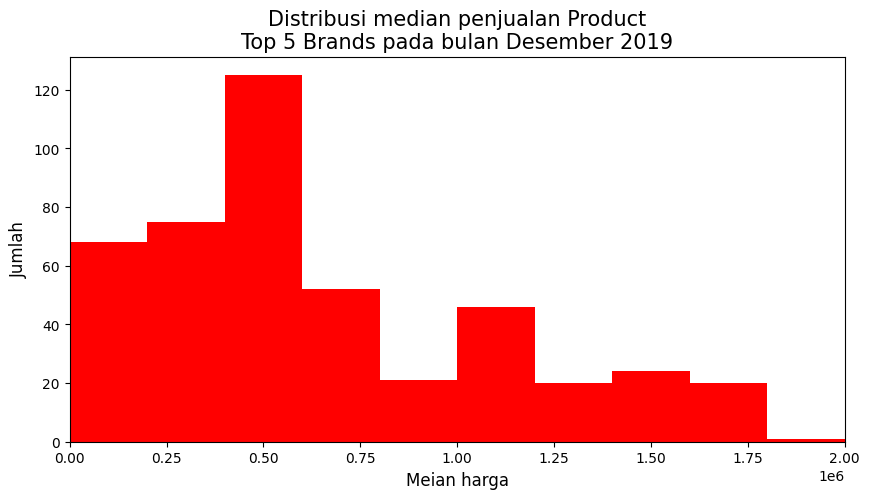

In [68]:
plt.figure(figsize=(10,5))
plt.hist(df_top5brand_desember_per_product.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='red')
plt.title('Distribusi median penjualan Product\nTop 5 Brands pada bulan Desember 2019',fontsize=15, color='black')
plt.xlabel('Meian harga', fontsize = 12)
plt.ylabel('Jumlah',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

Kasus 6 a : Korelasi quantity vs GMV

Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

([<matplotlib.axis.YTick at 0x7ff8e08b5660>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

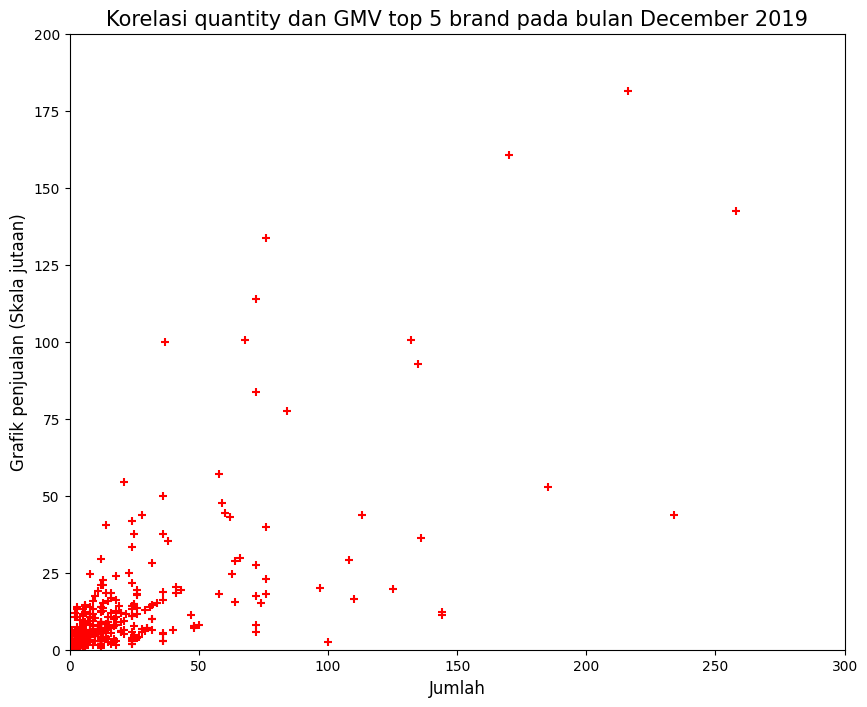

In [66]:
#agregat per product
df_top5brand_desember_per_product = df_top5brand_desember.groupby('product_id').agg({'quantity': 'sum', 'jual':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_top5brand_desember_per_product['quantity'],df_top5brand_desember_per_product['jual'], marker='+', color='red')
plt.title('Korelasi quantity dan GMV top 5 brand pada bulan December 2019',fontsize=15, color='black')
plt.xlabel('Jumlah', fontsize = 12)
plt.ylabel('Grafik penjualan (Skala jutaan)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

Kasus 6 b : Korelasi median harga vs quantity

Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

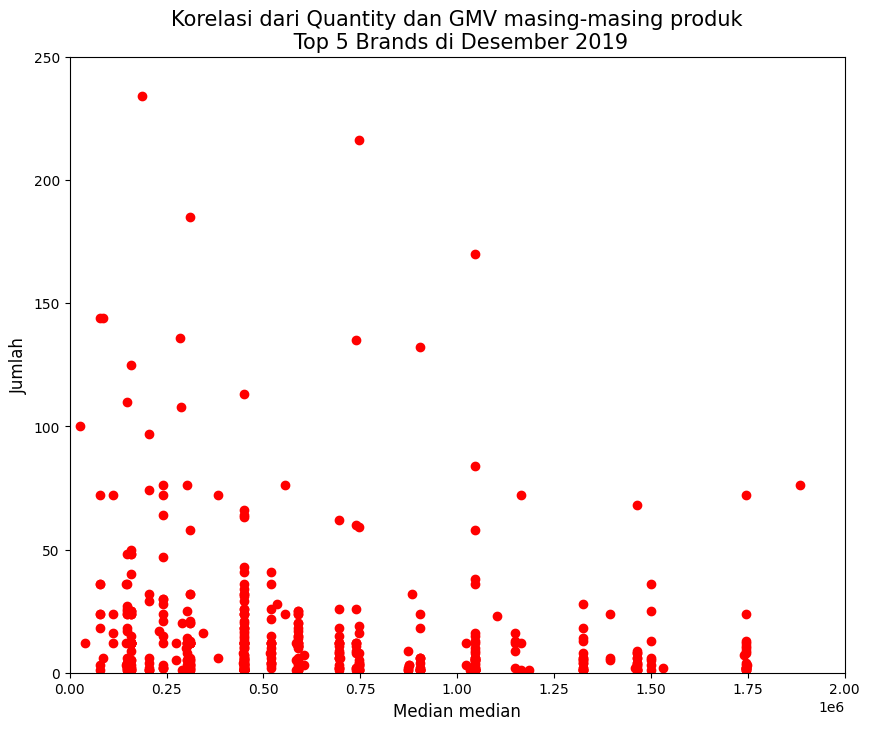

In [74]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
df_top5brand_desember_per_product = df_top5brand_desember.groupby('product_id').agg({'quantity': 'sum', 'jual':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(df_top5brand_desember_per_product['item_price'],df_top5brand_desember_per_product['quantity'], marker='o', color='red')
plt.title('Korelasi dari Quantity dan GMV masing-masing produk\n Top 5 Brands di Desember 2019',fontsize=15, color='black')
plt.xlabel('Median median', fontsize = 12)
plt.ylabel('Jumlah',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)

**Kesimpulan**


Dapat disimpulkan bahwa dari kelima top brand, brand S memiliki kuantitas top brands yang paling besar sebesar 2.197. Kemudian, Lonjakan yang cukup drastis ditunjukkan oleh brand P pada tanggal 6 Desember 2019 sebesar 300. Dimana lonjakan ini lebih tinggi sehingga perlu diberikan anotasi. Kemudian, dilihat dari sisi kuantitas produk yang laku terjual, brand S lebih banyak kuantitasnya. Berdasarkan stacked bar-chart top 5 brands, terdapat pola yang menarik. Brand S lebih banyak menjual kuantitas produknya dibawah 100. Sedangkan, brand P lebih banyak menjual kuantitas lebih dari sama dengan 100. Terdapat hubungan positif antara kuantitas dengan GMV yang artinya semakin banyak customer yang membeli produk dalam jumlah yang besar, dapat disimpulkan GMV yang dihasilkan juga akan semakin besar. Terdapat hubungan pula antara median harga dengan kuantitas produk. Hal tersebut berkorelasi positif yang artinya bahwa semakin murah harga suatu produk maka customer berpeluang besar untuk membeli jumlah produk dengan jumlah yang banyak.